<a href="https://colab.research.google.com/github/marianaufcg/Capacitacao/blob/main/atividade5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 4. -1.  0. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [ 0. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1.  0.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ...  0. -1.  4.]]

[[3.         3.         3.         ... 3.         3.         3.        ]
 [4.         3.49824837 3.29884691 ... 2.69765706 2.5        2.        ]
 [4.         3.69414658 3.49299352 ... 2.5        2.30234294 2.        ]
 ...
 [4.         3.09295673 2.5        ... 1.50700648 1.70115309 2.        ]
 [4.         2.5        1.90704327 ... 1.30585342 1.50175163 2.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]

[[7.]
 [3.]
 [3.]
 ...
 [1.]
 [1.]
 [3.]]



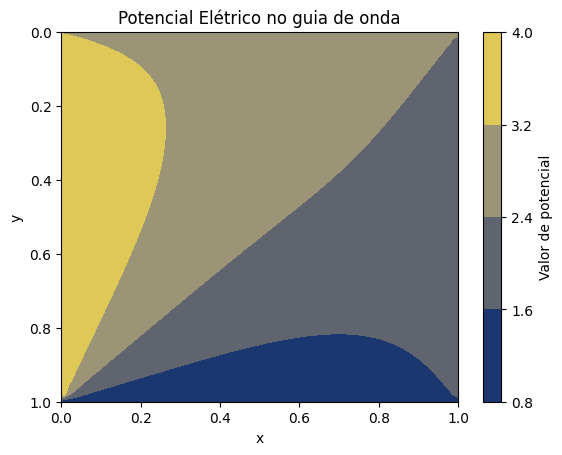

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a = 1 # largura do guia
b = 1 # altura do guia
h = 0.02 # espaçamento
V1 = 1 # parede inferior
V2 = 2 # parede à direita
V3 = 3 # parede superior
V4 = 4 # parede à esquerda

x = np.arange(0, a+(h/2), h)
y = np.arange(0, b+(h/2), h)

# Matriz dos pontos potenciais do guia ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

matriz_guia = np.zeros((len(y), len(x)))

matriz_guia[ :, len(x)-1] = V2
matriz_guia[:, 0] = V4
matriz_guia[0, :] = V3
matriz_guia[len(y)-1, :] = V1

# Matriz dos coeficientes do sistema de equações ~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

matriz_coeficientes = np.zeros(((len(y)-2)*(len(x)-2),(len(y)-2)*(len(x)-2)))

n = 0
for i in range(1, len(y)-1):
  for j in range(1, len(x)-1):

    lista_coeficientes = []

    for k in range(1, len(y)-1):
      for l in range(1, len(x)-1):

        if i == k and j == l:
          lista_coeficientes.append(4)

        elif i == k and (j == (l-1) or j == (l+1)):
          lista_coeficientes.append(-1)

        elif (i == (k-1) or i == (k+1)) and j == l:
          lista_coeficientes.append(-1)
        else:
          lista_coeficientes.append(0)

    matriz_coeficientes[n, :] = lista_coeficientes
    n += 1

# Matriz das condições de fronteira ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

matriz_condicoes_de_fronteira = np.zeros(((len(y)-2)*(len(x)-2), 1))

for i in range(1, len(y)-1):
  if i == 1:
    for j in range(1, len(x)-1):
      matriz_condicoes_de_fronteira[j-1][0] += matriz_guia[0][j]
  if i == len(y)-2:
    for j in range(1, len(x)-1):
      matriz_condicoes_de_fronteira[(len(x)-2)*(len(y)-3)+ (j-1)][0] += matriz_guia[len(y)-1][j]

for j in range(1, len(x)-1):
  if j == 1:
    for i in range(1, len(y)-1):
      matriz_condicoes_de_fronteira[(i-1)*(len(x)-2)][0] += matriz_guia[i][0]
  if j == len(x)-2:
    for i in range(1, len(y)-1):
      matriz_condicoes_de_fronteira[(len(x)-3) + (i-1)*(len(x)-2)][0] += matriz_guia[i][len(x)-1]

# Solução do sistema de equações ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

matriz_potencial = np.dot(np.linalg.inv(matriz_coeficientes), matriz_condicoes_de_fronteira)

for i in range(1, len(y)-1):
  for j in range(1, len(x)-1):
    matriz_guia[i][j] = matriz_potencial[(j-1) + (i-1)*(len(x)-2)][0]


# Plotagem ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

print(matriz_coeficientes)
print()
print(matriz_guia)
print()
print(matriz_condicoes_de_fronteira)
print()

plt.contourf(x, y, matriz_guia, levels= 3, cmap="cividis")
plt.gca().invert_yaxis()
plt.colorbar(label="Valor de potencial")
plt.title("Potencial Elétrico no guia de onda")
plt.xlabel("x")
plt.ylabel("y")
plt.show()